<a href="https://colab.research.google.com/github/rani-sneha/DataScience/blob/main/100-days-of-machine-learning/D26-D50/D28column_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Column Transformer

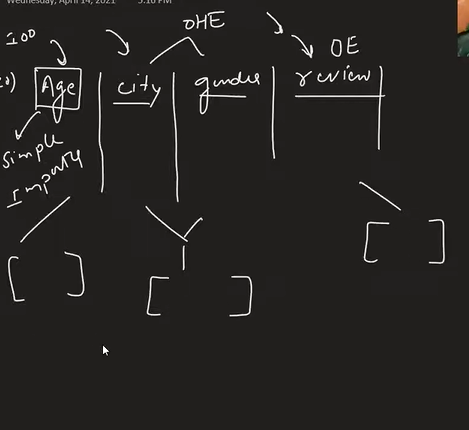

In [5]:
import pandas as pd
import numpy as np

You have to apply different transformer for different columns. So one unique numpy array will be formed for every column and the join it together.

In [3]:
covid='/content/drive/MyDrive/100-days-of-machine-learning/covid.csv'

In [6]:
df = pd.read_csv(covid)

In [7]:
df.sample(5)

,age,gender,fever,cough,city,has_covid
23,80,Female,98.0,Mild,Delhi,Yes
98,5,Female,98.0,Strong,Mumbai,No
4,65,Female,101.0,Mild,Mumbai,No
79,48,Female,103.0,Mild,Kolkata,Yes
54,60,Female,99.0,Mild,Mumbai,Yes


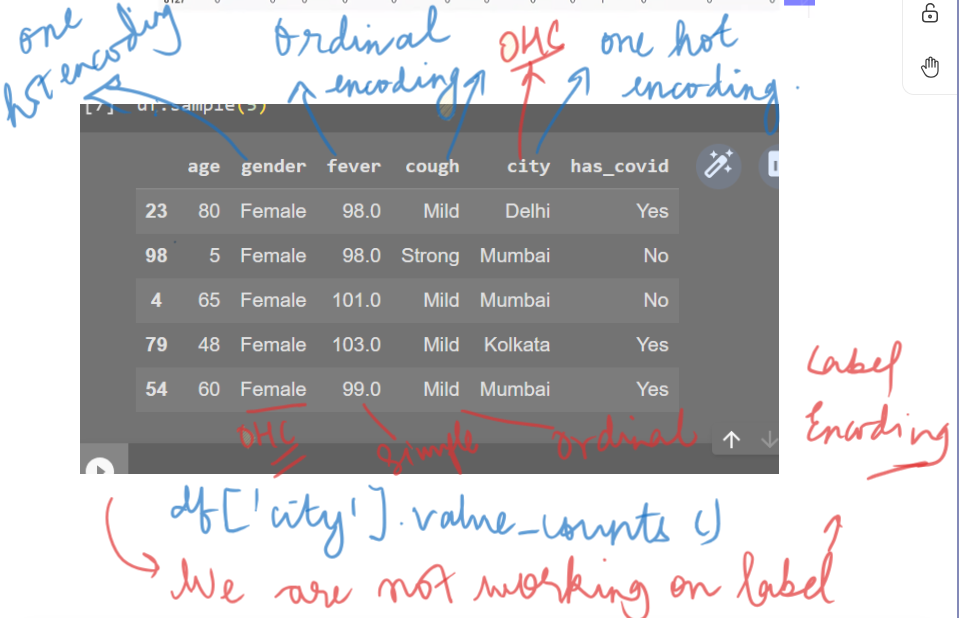

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df.drop(columns=['has_covid']),df['has_covid'], test_size=0.2)

In [10]:
X_train

,age,gender,fever,cough,city
79,48,Female,103.0,Mild,Kolkata
93,27,Male,100.0,Mild,Kolkata
24,13,Female,100.0,Strong,Kolkata
76,80,Male,100.0,Mild,Bangalore
85,16,Female,103.0,Mild,Bangalore
...,...,...,...,...,...
81,65,Male,99.0,Mild,Delhi
64,42,Male,104.0,Mild,Mumbai
2,42,Male,101.0,Mild,Delhi
78,11,Male,100.0,Mild,Bangalore


#1. Aam ZIndagi

In [21]:
from sklearn.impute import SimpleImputer
si= SimpleImputer()
X_train_fever=si.fit_transform(X_train[['fever']])
X_test_fever=si.fit_transform(X_test[['fever']])
X_train_fever.shape

(80, 1)

In [18]:
X_train_fever

array([[103.        ],
       [100.        ],
       [100.        ],
       [100.        ],
       [103.        ],
       [101.        ],
       [ 98.        ],
       [101.        ],
       [102.        ],
       [103.        ],
       [104.        ],
       [ 98.        ],
       [104.        ],
       [104.        ],
       [ 98.        ],
       [ 98.        ],
       [101.        ],
       [ 99.        ],
       [104.        ],
       [ 98.        ],
       [101.        ],
       [100.        ],
       [ 98.        ],
       [100.        ],
       [104.        ],
       [101.        ],
       [102.        ],
       [104.        ],
       [100.        ],
       [102.        ],
       [101.        ],
       [ 98.        ],
       [103.        ],
       [ 99.        ],
       [104.        ],
       [100.82666667],
       [100.82666667],
       [100.82666667],
       [104.        ],
       [ 98.        ],
       [ 98.        ],
       [ 99.        ],
       [102.        ],
       [ 98

In [24]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories([['Mild', 'Strong']]))
X_train_cough=oe.fit_transform(X_train[['cough']])
X_test_cough=oe,fit_transform(X_test[['coough']])
X_train_cough.shape

NameError: ignored

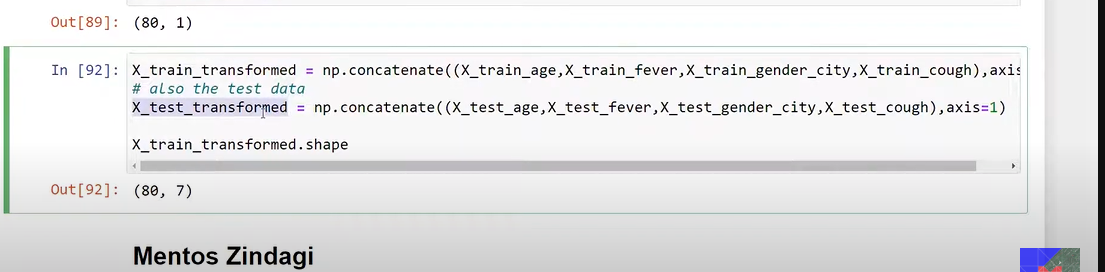

#2. Mentos Zindagi

In [25]:
from sklearn.compose import ColumnTransformer

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
transformer= ColumnTransformer(transformers=[
    ('tnf1', SimpleImputer(),['fever']),
    ('tnf2', OrdinalEncoder (categories=[['Mild', 'Strong']]), ['cough']),
    ('tnf3', OneHotEncoder(sparse=False, drop='first'),['gender', 'city'])
], remainder='passthrough')

In [37]:
transformer.fit_transform(X_train).shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(80, 7)

In [39]:
transformer.transform(X_test).shape

(20, 7)